## 1. Genel Bilgi
Bu bölümde veri setinin genel yapısına baktık. Sütun adları, veri tipleri ve eksik veri olup olmadığı incelendi.,

**EDA(KEŞİFSEL VERİ ANALİZİ)
1)Burada kullanacağımız kütüphaneleri içe aktarıyoruz.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



2)Burada ise grafiklerin daha güzel gözükmesi için komut giriyoruz.

In [10]:
sns.set(style="whitegrid")
plt.style.use("ggplot")

3)Veri setini okuyoruz.


In [13]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')


4)İlk 5 satırı gösteriyoruz.

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


5)Veri setinin genel bilgisini öğreniyoruz.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


6)Temel istatiksel özetini alıyoruz.

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


7)Eksik veri var mı ? Kontrol ediyoruz.

In [17]:

df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

8)Hedef değişkenin dağılımı (Outcome)

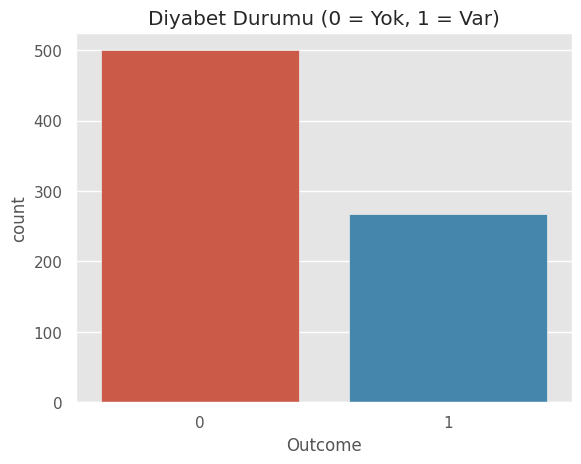

In [18]:


sns.countplot(x="Outcome", data=df)
plt.title("Diyabet Durumu (0 = Yok, 1 = Var)")
plt.show()


9)Korelasyon matrisi ve ısı haritası

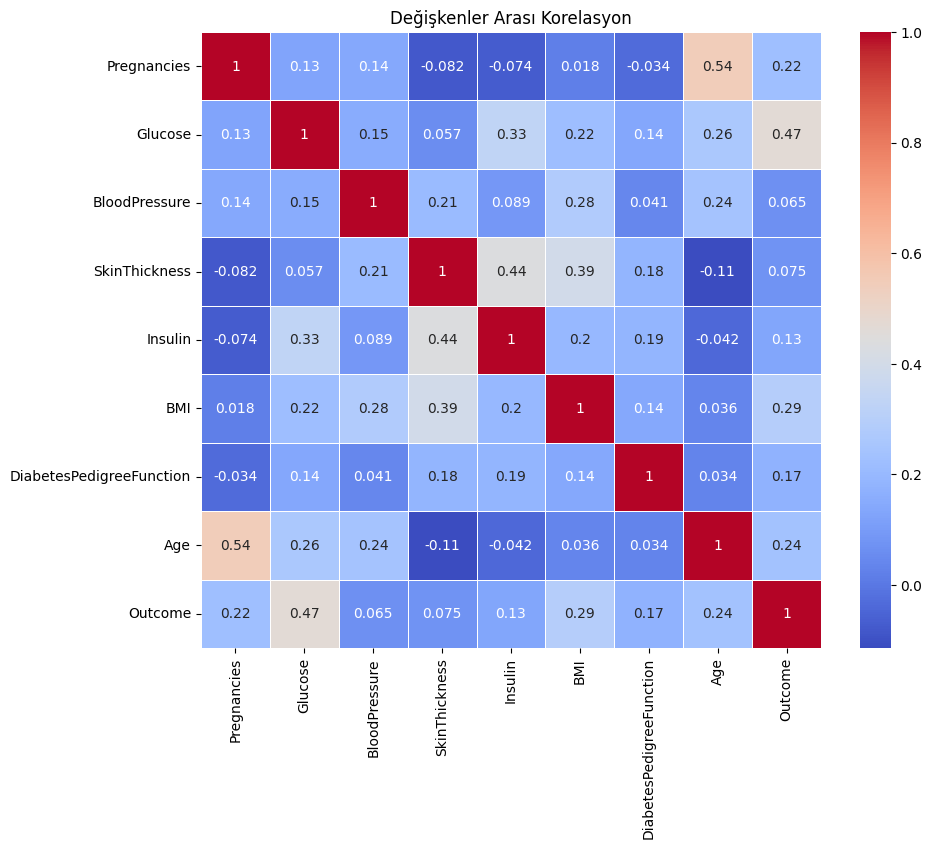

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Değişkenler Arası Korelasyon")
plt.show()


**VERİ ÖN İŞLEME
1)Anlamsız veya 0 değerler var mı?

In [24]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    print(f"{col} sütununda {df[df[col] == 0].shape[0]} tane sıfır var.")

Glucose sütununda 5 tane sıfır var.
BloodPressure sütununda 35 tane sıfır var.
SkinThickness sütununda 227 tane sıfır var.
Insulin sütununda 374 tane sıfır var.
BMI sütununda 11 tane sıfır var.


2)Sıfır Değerleri Ortalamayla Değişir.

In [26]:
for col in zero_columns:
    df[col] = df[col].replace(0, df[col].mean())

3)Normalizasyon

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = df.copy()
scaled_df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])


4)Eğitim /Test Verisi Olarak Böl

In [31]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop("Outcome", axis=1)
y = scaled_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**MODEL SEÇİMİ VE EĞİTİMİ
1)Model eğit(Train)

## Lojistik Regresyon ile Modelleme
Veri setimiz ikili sınıflandırma problemi olduğu için Lojistik Regresyon kullandık. 
Model eğitildikten sonra doğruluk, kesinlik, duyarlılık ve F1 skoru metrikleriyle değerlendirildi. 




In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

2)Tahmin yap

In [34]:
y_pred = model.predict(X_test)


3)Model Performansı

Doğruluk (Accuracy): 0.7792207792207793
Kesinlik (Precision): 0.7333333333333333
Duyarlılık (Recall): 0.6
F1 Skoru: 0.6599999999999999


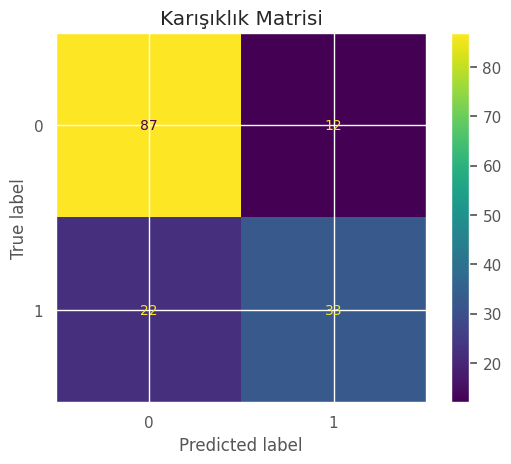

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Performans metrikleri
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Kesinlik (Precision):", precision_score(y_test, y_pred))
print("Duyarlılık (Recall):", recall_score(y_test, y_pred))
print("F1 Skoru:", f1_score(y_test, y_pred))

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Karışıklık Matrisi")
plt.show()
